In [122]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from colicoords import CellPlot, Cell, load, save
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import os

In [3]:
def load_im():
    return np.load('binary.npy'), np.load('brightfield.npy'), np.load('storm.npy')


cell_list = load('temp_cells.hdf5')
binary, brightfield, storm = load_im()

<IPython.core.display.Javascript object>


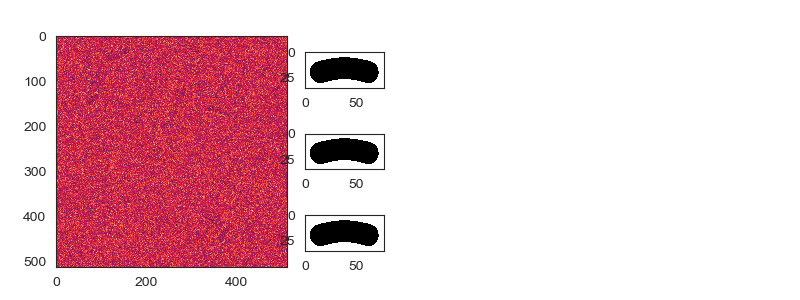

In [82]:
plt.figure(figsize=(8, 3))
gs1 = gridspec.GridSpec(3, 2, width_ratios=[1, 0.3])
gs1.update(left=0.05, right=0.48, wspace=0.01)
ax1 = plt.subplot(gs1[:, :-1])
ax1.imshow(im[0])

cp = CellPlot(cell_list[0])

ax2 = plt.subplot(gs1[0, -1])
cp.imshow("binary", ax=ax2)
ax3 = plt.subplot(gs1[1, -1])
cp.imshow("binary", ax=ax3)


ax4 = plt.subplot(gs1[2, -1])
cp.imshow("binary", ax=ax4)
plt.tight_layout()

In [89]:
data_dir = r'D:\Projects\CC_paper\figure_6_v3'
photons = [500, 1000, 10000]
conditions = ['binary', 'brightfield', 'storm_inner']

In [83]:
for ph in photons:
    im = np.load(os.path.join(data_dir, 'images', 'bf_noise_{}_photons.npy'.format(ph)))
    np.save(os.path.join(data_dir, 'plot_vars', 'bf_noise_{}_photons.npy'.format(ph)), im[0])

In [84]:
imgs = {ph: np.load(os.path.join(data_dir, 'plot_vars', 'bf_noise_{}_photons.npy'.format(ph))) for ph in photons}

In [94]:
for ph in photons:
    for condition in conditions:
        print(ph, condition)
        m_cells = load(os.path.join(data_dir, 'cell_obj', 'm_cells_ph_{}_filtered_{}.hdf5'.format(ph, condition)))
        save(os.path.join(data_dir, 'plot_vars', 'cells_{}_{}_photons.hdf5'.format(condition, ph)), m_cells[:20])

500 binary
500 brightfield
500 storm_inner
1000 binary
1000 brightfield
1000 storm_inner
10000 binary
10000 brightfield
10000 storm_inner


In [110]:
import matplotlib.colors as mcolors

#https://stackoverflow.com/questions/16834861/create-own-colormap-using-matplotlib-and-plot-color-scale
def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)


c = mcolors.ColorConverter().to_rgb
mcm = make_colormap(
    [ c('black'), c('magenta')])
ccm = make_colormap(
    [c('black'), c('cyan')])

In [114]:
def prune(arr):
    arr = arr.flatten()
    arr[np.isinf(arr)] = 10
    return arr[~np.isnan(arr)]

In [97]:
cell_dict = {}
for ph in photons:
    cell_dict[ph] = {}
    for condition in conditions:
        cell_dict[ph][condition] = load(os.path.join(data_dir, 'plot_vars', 'cells_{}_{}_photons.hdf5'.format(condition, ph)))

<IPython.core.display.Javascript object>


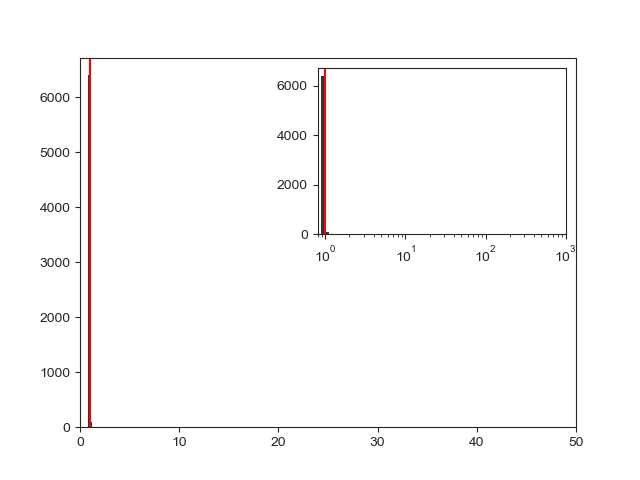

In [154]:
import seaborn as sns
sns.set_style("ticks")
fig, ax = plt.subplots()
make_obj_hist(ax, v)

In [191]:
linewidth

0.5

<IPython.core.display.Javascript object>


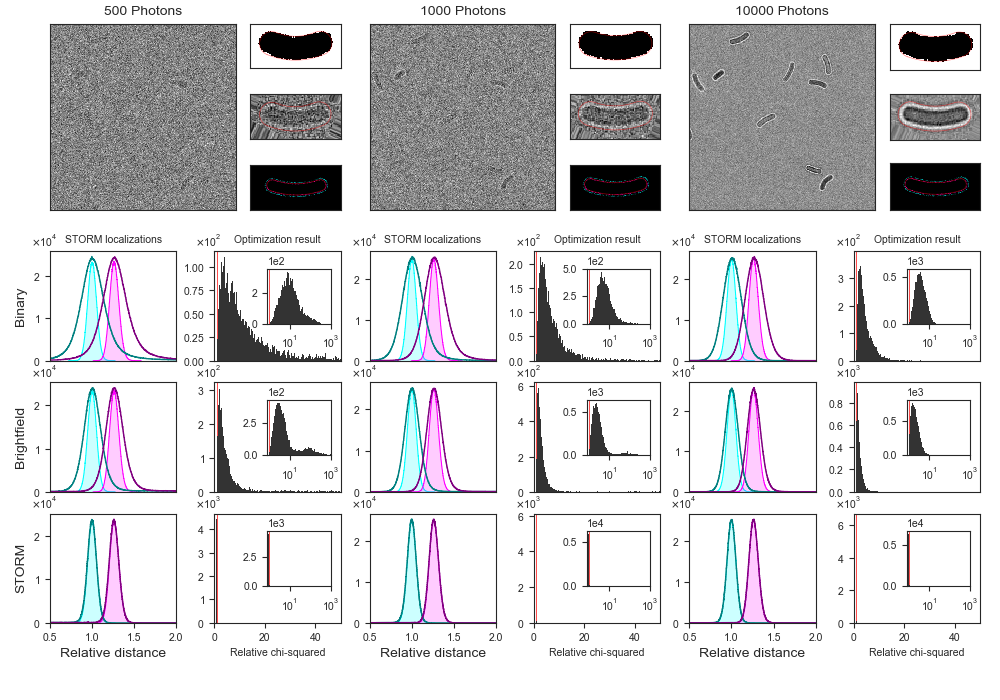

In [229]:
labelsize=7.5
upscale = 10  # STORM render resolution
step = 1  # fraction of points plotted in histogram
linewidth=0.5

colors = ['cyan', 'magenta', (0, 0.5, 0.5), (0.5, 0, 0.5)]
def make_r_hist(ax, r1, r2, r3, r4, step=1):
    h = ax.hist(r1[::step], bins='fd', linewidth=0.75, histtype='step', color=colors[0])
    h = ax.hist(r1[::step], bins='fd', linewidth=0, alpha=0.2, color=colors[0])

    h = ax.hist(r2[::step], bins='fd', linewidth=0.75, linestyle='-', histtype='step', color=colors[1])
    h = ax.hist(r2[::step], bins='fd', linewidth=0, linestyle='-', alpha=0.2, color=colors[1])

    h = ax.hist(r3[::step], bins='fd', linewidth=1, histtype='step', color=colors[2])
    
    h = ax.hist(r4[::step], bins='fd', linewidth=1, histtype='step', color=colors[3])
    
    ax.set_xlim(0.5, 2)

def make_obj_hist(ax, values, step=1):
    binwidth = 0.2
    bins = np.arange(0, 50 + binwidth, binwidth)
    bins_log = 10**np.arange(-1, 5.5, 0.05)

    h = ax.hist(values[::step], bins=bins, color='#333333', linewidth=0)
    ax.axvline(1, color='r', linewidth=linewidth, zorder=-1)
    ax.set_xlim(0, 50)
    
#     bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
#     width, height = bbox.width, bbox.height
    axins = inset_axes(ax, width='100%', height='100%', bbox_to_anchor=(0.475,0.4,0.5,0.5), bbox_transform=ax.transAxes, loc=1)
    axins.hist(values[::step], bins=bins_log, color='#333333', linewidth=0)
    axins.set_xscale('log')
    axins.axvline(1, color='r', linewidth=linewidth, zorder=-1)
    axins.tick_params(direction='out', labelsize=labelsize)
    axins.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
    axins.set_xlim(8e-1, 1000)
    axins.yaxis.offsetText.set_fontsize(labelsize)
    axins.yaxis.set_offset_position('left')



fig = plt.figure(figsize=(10, 17.8 /2.54))
outer_grid = gridspec.GridSpec(2, 3, wspace=0.1, hspace=0.15, height_ratios=[0.5, 1])
outer_grid.update(left=0.05, right=0.98, top=0.965)
for i, ph in enumerate(photons):
    inner_grid = gridspec.GridSpecFromSubplotSpec(3, 2, width_ratios=[1, 0.45],
            subplot_spec=outer_grid[0, i], wspace=0.0, hspace=0.)

    ax1 = plt.subplot(inner_grid[:, :-1])
    ax1.imshow(imgs[ph], cmap='gray')
    ax1.set_anchor('W')
    ax1.set_title('{} Photons'.format(ph), fontsize=10)
    
    ci = 0
    linewidth=0.5
    alpha =0.5
    
    ax2 = plt.subplot(inner_grid[0, -1])
    ax2.set_anchor('NE')
    cp = CellPlot(cell_dict[ph]['binary'][ci])
    cp.imshow("binary", ax=ax2)
    cp.plot_outline(ax=ax2, linewidth=linewidth, alpha=alpha)
    
    ax3 = plt.subplot(inner_grid[1, -1])
    ax3.set_anchor('E')
    cp = CellPlot(cell_dict[ph]['brightfield'][ci])
    cp.imshow("brightfield", ax=ax3)
    cp.plot_outline(ax=ax3, linewidth=linewidth, alpha=alpha)

    ax4 = plt.subplot(inner_grid[2, -1])
    ax4.set_anchor('SE')
    cp = CellPlot(cell_dict[ph]['storm_inner'][ci])    
    cp.imshow(np.zeros(cp.cell_obj.data.shape), cmap='gray')  # Black background
    cp.plot_storm(data_name='storm_inner', upscale=upscale, method='gauss', alpha_cutoff=0.25, cmap=mcm)
    cp.plot_storm(data_name='storm_outer', upscale=upscale, method='gauss', alpha_cutoff=0.25, cmap=ccm)
    cp.plot_outline(ax=ax4, linewidth=linewidth, alpha=alpha)
    plt.tight_layout()
    #plt.subplots_adjust(left=0)
    
    plt.subplots_adjust(left=0, right=1, wspace=0)

    for ax in [ax1, ax2, ax3, ax4]:
        ax.set_xticks([])
        ax.set_yticks([])
    
for i, ph  in enumerate(photons):
    inner_grid = gridspec.GridSpecFromSubplotSpec(3, 2,
        subplot_spec=outer_grid[1, i], wspace=0.3)
    
    for j, cond in enumerate(conditions):
        if 1:#cond == 'binary' and ph == 500:
            # Create r histogram plot
            r_m_inner = prune(np.load(os.path.join(data_dir, 'r_values', 'r_inner_m_ph_{}_{}.npy'.format(ph, cond))))
            r_m_outer = prune(np.load(os.path.join(data_dir, 'r_values', 'r_outer_m_ph_{}_{}.npy'.format(ph, cond))))
            r_gt_inner = prune(np.load(os.path.join(data_dir, 'r_values', 'r_inner_gt_ph_{}_{}.npy'.format(ph, cond))))
            r_gt_outer = prune(np.load(os.path.join(data_dir, 'r_values', 'r_outer_gt_ph_{}_{}.npy'.format(ph, cond))))

            gs = inner_grid[j, 0]
            ax = plt.subplot(gs)
            make_r_hist(ax, r_gt_inner, r_gt_outer, r_m_inner, r_m_outer, step=step)
            ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
            ax.yaxis.offsetText.set_fontsize(labelsize)
            ax.yaxis.offsetText.set_position((-0.15, 1))
   
            if ph == 500:
                labels = ['Binary', 'Brightfield', 'STORM']
                ax.set_ylabel(labels[j])
            if j == 0:
                ax.set_title('STORM localizations', fontsize=labelsize)
            if j < 2:
                ax.set_xticks([])
            else:
                ax.set_xlabel('Relative distance', fontsize=labelsize)
            
            ax.tick_params(labelsize=labelsize)

            # Create minimize result histogram
            gs = inner_grid[j, 1]
            ax = plt.subplot(gs)

            obj_vals = np.loadtxt(os.path.join(data_dir, 'obj_values', 'obj_vals_storm_ph_{}_{}.txt'.format(ph, cond)))
            v = obj_vals[:, 0] / obj_vals[:, 1]

            make_obj_hist(ax, v, step=1)
            
            if j == 0:
                ax.set_title('Optimization result', fontsize=labelsize)              
            if j < 2:
                ax.set_xticks([])
            else:
                ax.set_xlabel('Relative chi-squared', fontsize=labelsize)
                
            ax.tick_params(labelsize=labelsize)
            ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
            ax.yaxis.offsetText.set_fontsize(labelsize)
            ax.yaxis.offsetText.set_position((-0.15, 1))
            
#     for gs in inner_grid:
#         ax = plt.subplot(gs)
#         ax.hist(np.random.rand(100))
    
#     plt.tight_layout()

    
plt.savefig('test.png', dpi=600)
plt.savefig('test.pdf', dpi=600)

21.433355097274077


<IPython.core.display.Javascript object>


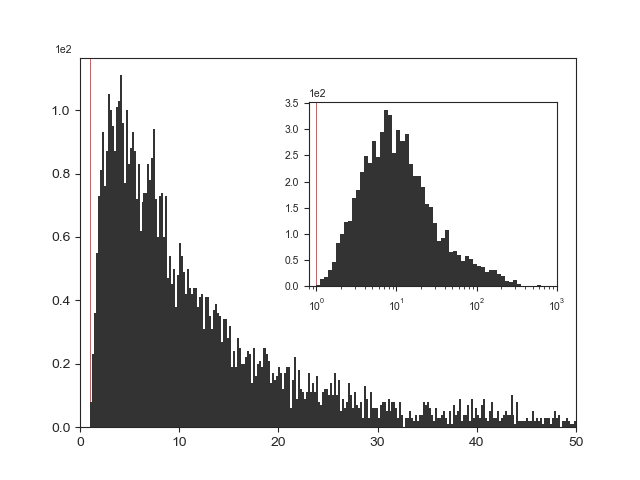

In [224]:
ph = 500
cond = 'binary'

obj_vals = np.loadtxt(os.path.join(data_dir, 'obj_values', 'obj_vals_storm_ph_{}_{}.txt'.format(ph, cond)))
v = obj_vals[:, 0] / obj_vals[:, 1]
print(v.mean())

fig, ax = plt.subplots()
make_obj_hist(ax, v)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

ax.yaxis.offsetText.set_fontsize(labelsize)
ax.yaxis.offsetText.set_position((-0.05, 1))

<IPython.core.display.Javascript object>


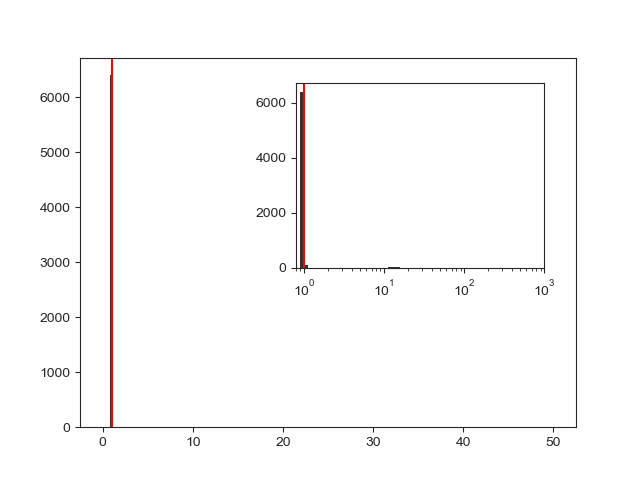

(0.8, 1000)

In [208]:
binwidth = 0.2
bins=np.arange(0, 50 + binwidth, binwidth)
bins_l = 10**np.arange(-1, 5.5, 0.05)

plt.figure()
h = plt.hist(v, bins=bins, color='#333333', linewidth=0)
ax = plt.gca()
axins = inset_axes(ax, width='100%', height='100%', bbox_to_anchor=(0.45,0.45,0.5,0.5), bbox_transform=ax.transAxes, loc=1)
#h = plt.hist(v1, bins=bins, alpha=0.5)
#h = plt.hist(v2, bins=bins, alpha=0.5)
axins.hist(v, bins=bins_l, color='#333333', linewidth=0)
axins.set_xscale('log')
axins.axvline(1, color='r')

#plt.xscale('log')
ax.axvline(1, color='r')
plt.xlim(8e-1, 1000)
#plt.savefig('10k_storm.png')

<IPython.core.display.Javascript object>


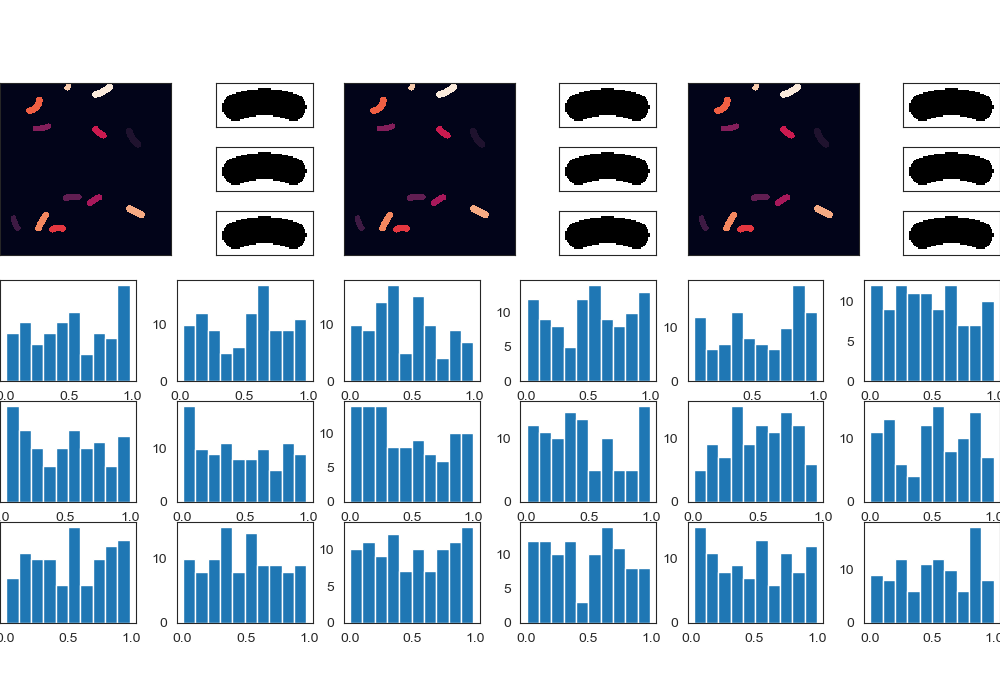

In [76]:
fig = plt.figure(figsize=(10, 17.8 /2.54))
outer_grid = gridspec.GridSpec(2, 3, wspace=0.1, hspace=0.1, height_ratios=[0.5, 1])

for i in range(3):
    inner_grid = gridspec.GridSpecFromSubplotSpec(3, 2, width_ratios=[1, 0.45],
            subplot_spec=outer_grid[0, i], wspace=0.0, hspace=0.)

    ax1 = plt.subplot(inner_grid[:, :-1])
    ax1.imshow(binary[0])
    ax1.set_anchor('W')
    cp = CellPlot(cell_list[0])

    ax2 = plt.subplot(inner_grid[0, -1])
    ax2.set_anchor('NE')
    cp.imshow("binary", ax=ax2)
    ax3 = plt.subplot(inner_grid[1, -1])
    ax3.set_anchor('E')
    cp.imshow("binary", ax=ax3)


    ax4 = plt.subplot(inner_grid[2, -1])
    ax4.set_anchor('SE')
    cp.imshow("binary", ax=ax4)
    plt.tight_layout()
    #plt.subplots_adjust(left=0)
    
    plt.subplots_adjust(left=0, right=1, wspace=0)

    for ax in [ax1, ax2, ax3, ax4]:
        ax.set_xticks([])
        ax.set_yticks([])
    
for i in range(3):
    inner_grid = gridspec.GridSpecFromSubplotSpec(3, 2,
        subplot_spec=outer_grid[1, i], wspace=0.3)
    
    for gs in inner_grid:
        ax = plt.subplot(gs)
        ax.hist(np.random.rand(100))
    
    plt.tight_layout()



<IPython.core.display.Javascript object>


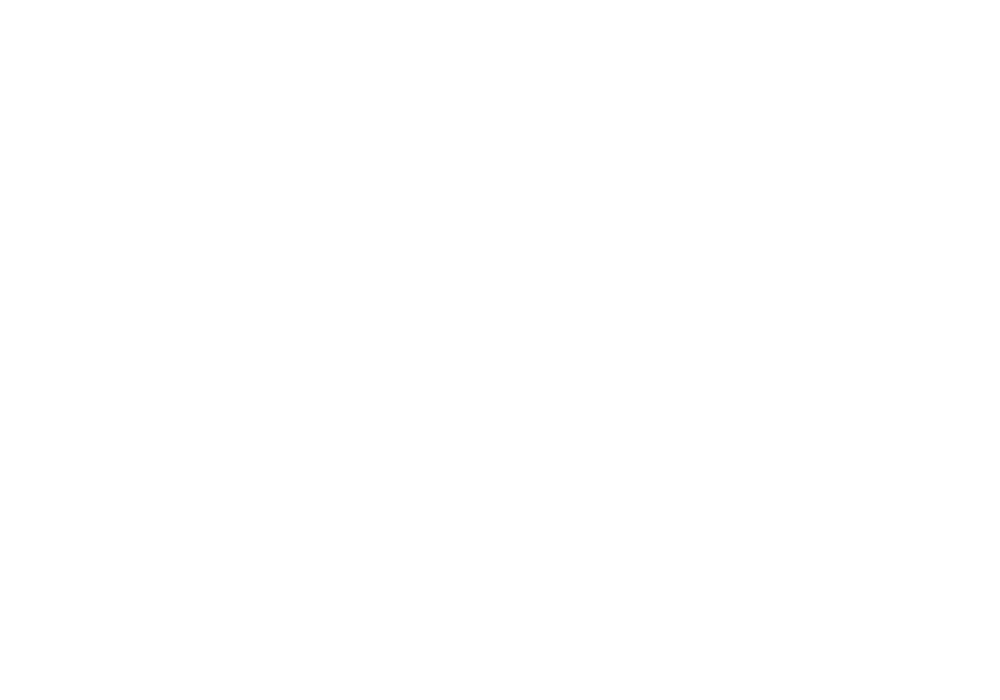

In [6]:


fig = plt.figure(figsize=(10, 17.8 /2.54))
